## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 3*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


3. Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).
Mostrar a través de ejemplos la imagen original y la imagen ecualizada. Mostrar también los histogramas normalizados y su distribución acumulada de ambas imágenes. Comparar los resultados de su función contra alguna función ya predefinida en Python para calcular ecualizaciones. Por ejemplo, en scikit-image, tenemos la función skimage.exposure.equalize hist; o en OpenCV, tenemos la función cv2.equalizeHist. 


    - ¿Son iguales sus resultados con los de la función? Explique por qu´e son iguales o explique por qué hay diferencias.

____
#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [208]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Posteriormente, se define la función que ecualiza el histograma de una imagen en escala de grises. Para ello, se utiliza np.histogram para obtener el histograma de la imagen, y np.cumsum para obtener la distribución acumulada.

In [209]:
def histogram_equalization(image):

    # Crear histograma de la imagen (256 bines, de 0 a 255)
    hist, bins = np.histogram(image.flatten(), 256, [0, 255])

    # Histograma normalizado
    hist_normalized = hist / hist.sum()
    
    # Histograma acumulado
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Ecualizar la imagen manualmente
    equalized_img = cdf[image] * 256 / cdf.max()

    # Crear histograma de la imagen ecualizada
    hist_eq, bins_eq = np.histogram(equalized_img.flatten(), 256, [0, 255])

    # Histograma normalizado
    hist_normalized_eq = hist_eq / hist_eq.sum()

    # Histograma acumulado
    cdf_m = hist_eq.cumsum()
    cdf_m_eq = cdf_m * hist_eq.max() / cdf_m.max()

    return equalized_img, hist_normalized, cdf_normalized, hist_normalized_eq, cdf_m_eq

Luego, se realizó una función que permite mostrar las imágenes (original y ecualizadas).

In [210]:
def plot_images(img_original, img_equalized_manual, img_equalized_cv2):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax = axes.ravel()

    ax[0].imshow(img_original, cmap='gray')
    ax[0].set_title('Imagen Original')

    ax[1].imshow(img_equalized_manual, cmap='gray')
    ax[1].set_title('Imagen Ecualizada (Manual)')

    ax[2].imshow(img_equalized_cv2, cmap='gray')
    ax[2].set_title('Imagen Ecualizada (cv2)')

    plt.show()

Como se puede observar a continuación, las imágenes ecualizadas son más claras y con mayor contraste que las originales. Cabe destacar que la implementación manual y de CV2 presentan resultados muy similares, lo que indica que la implementación manual es correcta.

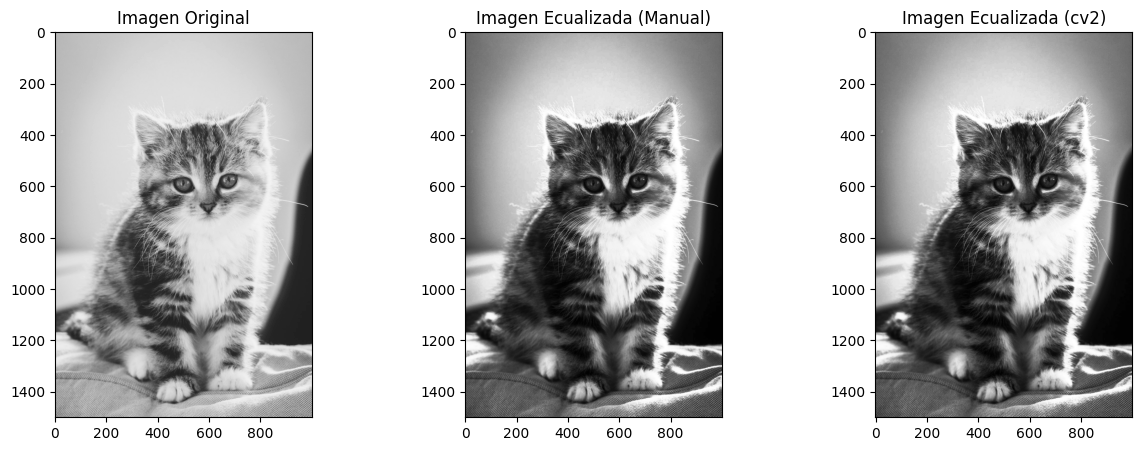

In [211]:
image = cv2.imread(cv2.samples.findFile("imgs/gatito.jpeg"), cv2.IMREAD_GRAYSCALE)

# Aplicar la función de ecualización de histograma
equalized_img, hist_normalized, cdf_normalized, hist_normalized_eq, cdf_m_eq = histogram_equalization(image)

# Aplicar la función de ecualización de cv2.equalizeHist
cv2_equalized_img = cv2.equalizeHist(image)

# Mostrar los resultados (imagen original, imagen ecualizada manualmente, imagen ecualizada con cv2)
plot_images(image, equalized_img, cv2_equalized_img)

Posteriormente, se comparan los histogramas de las imágenes originales y ecualizadas, y se observa que los histogramas de las imágenes ecualizadas son más uniformes que los de las imágenes originales.

In [212]:
def plot_histograms(hist_normalized, hist_cum, hist_normalized_eq, hist_cum_eq, cv2_equalized_img):

    fig, axes = plt.subplots(3, 2, figsize=(20, 10))
    ax = axes.ravel()

    ax[0].plot(hist_normalized, color='black')
    ax[0].set_title('Histograma Normalizado (Imagen original)')

    ax[1].plot(hist_cum, color='black')
    ax[1].set_title('Histograma Acumulado (Imagen original)')

    ax[2].plot(hist_normalized_eq, color='black')
    ax[2].set_title('Histograma Normalizado Ecualizado (Imagen ecualizada manualmente)')

    ax[3].plot(hist_cum_eq, color='black')
    ax[3].set_title('Histograma Acumulado Ecualizado (Imagen ecualizada manualmente)')

    hist_eq_cv, bins_eq_cv = np.histogram(cv2_equalized_img.flatten(), 256, [0, 255])
    hist_normalized_eq_cv = hist_eq_cv / hist_eq_cv.sum()
    hist_cum_eq_cv = hist_eq_cv.cumsum() * hist_eq_cv.max() / hist_eq_cv.cumsum().max()
    
    ax[4].plot(hist_normalized_eq_cv, color='black')
    ax[4].set_title('Histograma Normalizado Ecualizado (Imagen ecualizada con cv2)')

    ax[5].plot(hist_cum_eq_cv, color='black')
    ax[5].set_title('Histograma Acumulado Ecualizado (Imagen ecualizada con cv2)')

    plt.show()

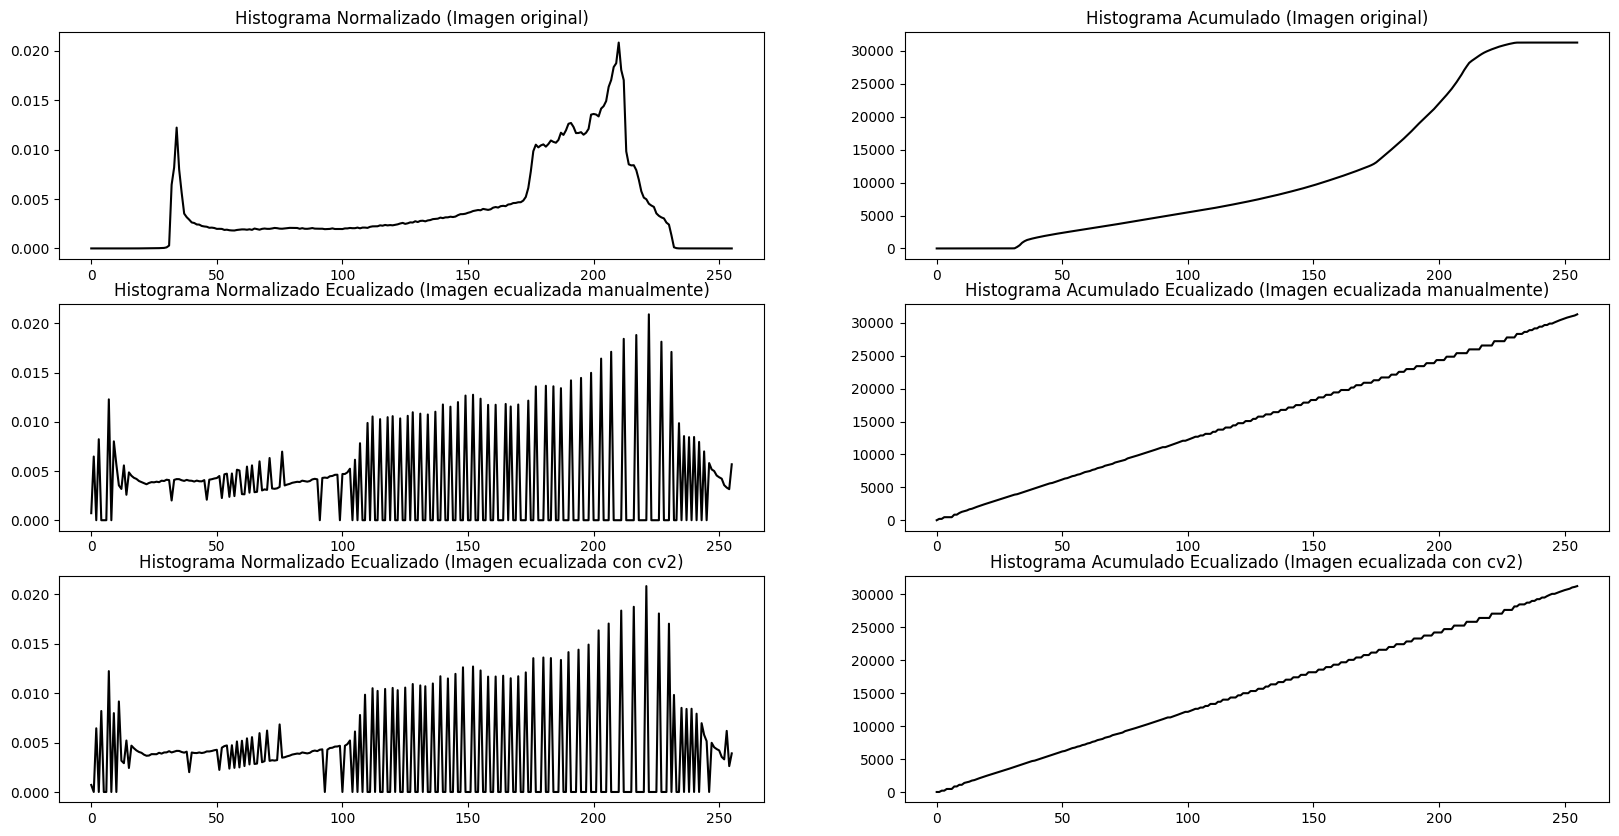

In [213]:
plot_histograms(hist_normalized, cdf_normalized, hist_normalized_eq, cdf_m_eq, cv2_equalized_img)

¿Son iguales sus resultados con los de la funcion? Explique por que son iguales o explique por qué hay diferencias


- En este caso, se puede observar que la función implementada presenta resultados muy similares a la función de CV2 (cv2.equalizeHist). Esto se debe a que ambas funciones realizan un proceso de ecualización de histograma, el cual consiste en ajustar la distribución de los niveles de intensidad de la imagen para que se encuentren distribuidos de manera más uniforme posible (obviamente, sin perder la información de la imagen original).

- Se cree que la diferencia se basa principalmente en el funcionamiento interno de las funciones. Por ejemplo, en la implementación manual se utilizó np.histogram para obtener el histograma de la imagen; sin embargo, en la función de CV2 se utilizan otros métodos para obtener el histograma. Otra posibilidad es que la función de CV2 tenga un preprocesamiento adicional que no se realizó en la implementación manual.

- Sin embargo, a pesar de las mínimas diferencias, se puede observar que los resultados son muy similares, lo que indica que la implementación manual es correcta.